In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import logging
import pandas as pd
import numpy as np
import imblearn as imb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from rdkit import Chem
from rdkit.Chem import Draw


logging.basicConfig(level=logging.INFO, stream=sys.stdout)
pd.set_option('display.max_colwidth', None)

import sys
sys.path.append('../')
from sklearn.model_selection import GridSearchCV
from VisUtils import *
from split_data import *
from RF_Utils import *


In [2]:
split_path = '../../../../data/NEK_data_4Berkeley/NEK2/inhib/'
# split_path = 'msse/capstone/data/NEK_data_4Berkeley/NEK2/inhib/'
# msse/capstone/data/NEK_data_4Berkeley/NEK2/inhib/inhib_test_x_normalized.csv
train_x_df = pd.read_csv(split_path+'inhib_train_x_normalized.csv')
train_y_df= pd.read_csv(split_path+'inhib_train_y_normalized.csv')
test_x_df= pd.read_csv(split_path+'inhib_test_x_normalized.csv')
test_y_df= pd.read_csv(split_path+'inhib_test_y_normalized.csv')

train_x = train_x_df.to_numpy()
train_y = train_y_df.to_numpy().reshape(-1)
test_x = test_x_df.to_numpy()
test_y = test_y_df.to_numpy().reshape(-1)
train_x.shape, train_y.shape, test_x.shape, test_y.shape




((1124, 306), (1124,), (282, 306), (282,))

In [5]:
train_x_dfOVER = pd.read_csv(split_path+'inhib_train_x_SMOTE.csv')
train_y_dfOVER= pd.read_csv(split_path+'inhib_train_y_SMOTE.csv')
test_x_dfOVER= pd.read_csv(split_path+'inhib_test_x_SMOTE.csv')
test_y_dfOVER= pd.read_csv(split_path+'inhib_test_y_SMOTE.csv')

train_xOVER = train_x_dfOVER.to_numpy()
train_yOVER = train_y_dfOVER.to_numpy().reshape(-1)
test_xOVER = test_x_dfOVER.to_numpy()
test_yOVER = test_y_dfOVER.to_numpy().reshape(-1)
train_xOVER.shape, train_yOVER.shape, test_xOVER.shape, test_yOVER.shape

((3045, 306), (3045,), (408, 306), (408,))

In [7]:
train_x_dfUNDER = pd.read_csv(split_path+'inhib_train_x_UNDER.csv')
train_y_dfUNDER= pd.read_csv(split_path+'inhib_train_y_UNDER.csv')
test_x_dfUNDER= pd.read_csv(split_path+'inhib_test_x_UNDER.csv')
test_y_dfUNDER= pd.read_csv(split_path+'inhib_test_y_UNDER.csv')

train_xUNDER = train_x_dfUNDER.to_numpy()
train_yUNDER = train_y_dfUNDER.to_numpy().reshape(-1)
test_xUNDER = test_x_dfUNDER.to_numpy()
test_yUNDER = test_y_dfUNDER.to_numpy().reshape(-1)
train_xUNDER.shape, train_yUNDER.shape, test_xUNDER.shape, test_yUNDER.shape

((223, 306), (223,), (408, 306), (408,))

In [8]:
train_x_dfADASYN = pd.read_csv(split_path+'inhib_train_x_normADASYN.csv')
train_y_dfADASYN= pd.read_csv(split_path+'inhib_train_y_normADASYN.csv')
test_x_dfADASYN= pd.read_csv(split_path+'inhib_test_x_normADASYN.csv')
test_y_dfADASYN= pd.read_csv(split_path+'inhib_test_y_normADASYN.csv')

train_xADASYN = train_x_dfADASYN.to_numpy()
train_yADASYN = train_y_dfADASYN.to_numpy().reshape(-1)
test_xADASYN = test_x_dfADASYN.to_numpy()
test_yADASYN = test_y_dfADASYN.to_numpy().reshape(-1)
train_xADASYN.shape, train_yADASYN.shape, test_xADASYN.shape, test_yADASYN.shape

((2157, 306), (2157,), (282, 306), (282,))

# normalized MOE 

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.957, precision: 0.500, recall: 0.083, specificity: 0.996


<Figure size 600x400 with 0 Axes>

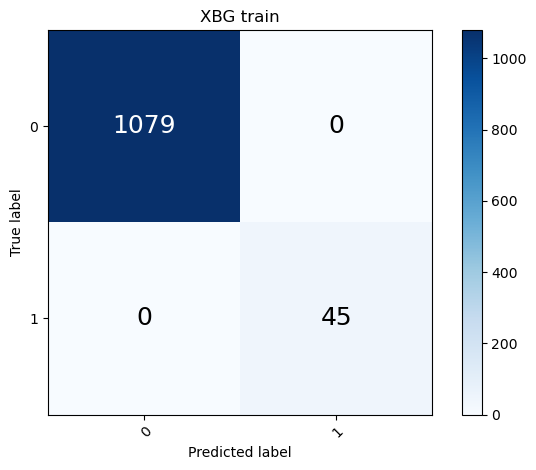

<Figure size 600x400 with 0 Axes>

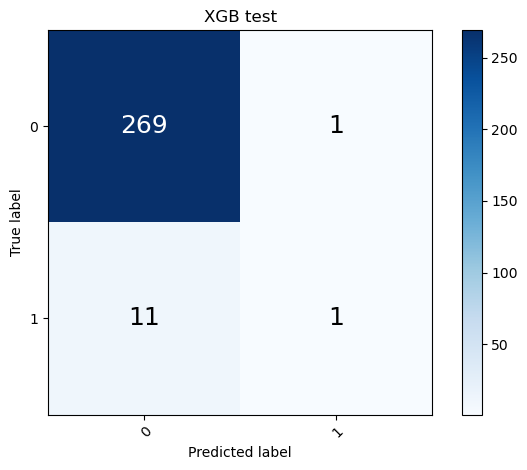

In [10]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
xgb_model.fit(train_x, train_y)
train_pred = xgb_model.predict(train_x)
test_pred = xgb_model.predict(test_x)
rf_results2(xgb_model, train_x, train_y, test_x, test_y)
plot_confusion_matrix(train_y,train_pred , ['0','1'], title='XBG train')
plot_confusion_matrix(test_y,test_pred , ['0','1'], title='XGB test')

# SMOTE

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.963, precision: 0.882, recall: 0.536, specificity: 0.995


<Figure size 600x400 with 0 Axes>

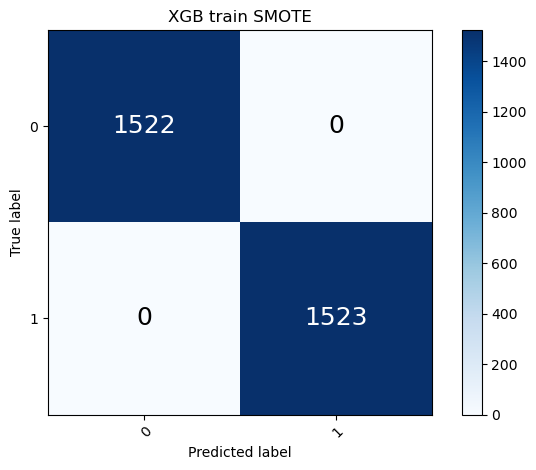

<Figure size 600x400 with 0 Axes>

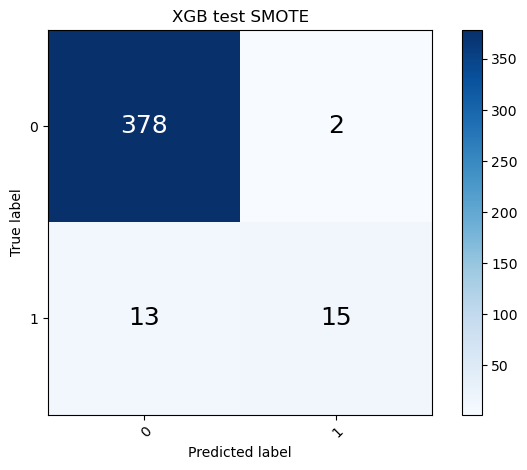

In [12]:
xgb_modelSMOTE = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelSMOTE.fit(train_xOVER, train_yOVER)
train_predSMOTE = xgb_modelSMOTE.predict(train_xOVER)
test_predSMOTE = xgb_modelSMOTE.predict(test_xOVER)
rf_results2(xgb_modelSMOTE, train_xOVER, train_yOVER, test_xOVER, test_yOVER)
plot_confusion_matrix(train_yOVER,train_predSMOTE , ['0','1'], title='XGB train SMOTE')
plot_confusion_matrix(test_yOVER,test_predSMOTE , ['0','1'], title='XGB test SMOTE')

# Undersampled

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.841, precision: 0.260, recall: 0.714, specificity: 0.850


<Figure size 600x400 with 0 Axes>

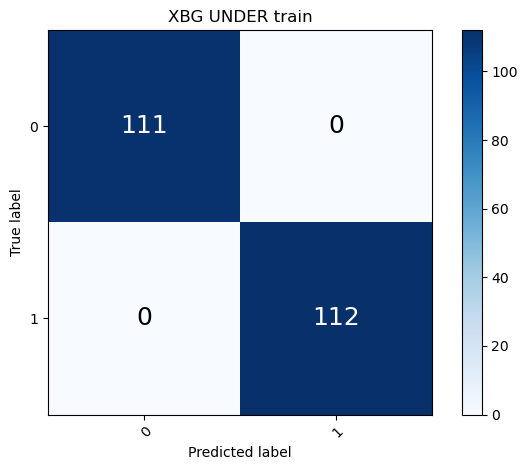

<Figure size 600x400 with 0 Axes>

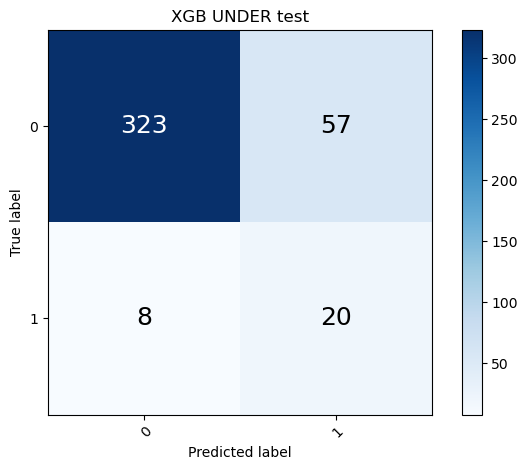

In [14]:
xgb_modelUNDER = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelUNDER.fit(train_xUNDER, train_yUNDER)
train_predUNDER = xgb_modelUNDER.predict(train_xUNDER)
test_predUNDER = xgb_modelUNDER.predict(test_xUNDER)
plot_confusion_matrix(train_yUNDER,train_predUNDER , ['0','1'], title='XBG UNDER train')
rf_results2(xgb_modelUNDER, train_xUNDER, train_yUNDER, test_xUNDER, test_yUNDER)
plot_confusion_matrix(test_yUNDER,test_predUNDER , ['0','1'], title='XGB UNDER test')

# ADASYN

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.961, precision: 0.600, recall: 0.250, specificity: 0.993


<Figure size 600x400 with 0 Axes>

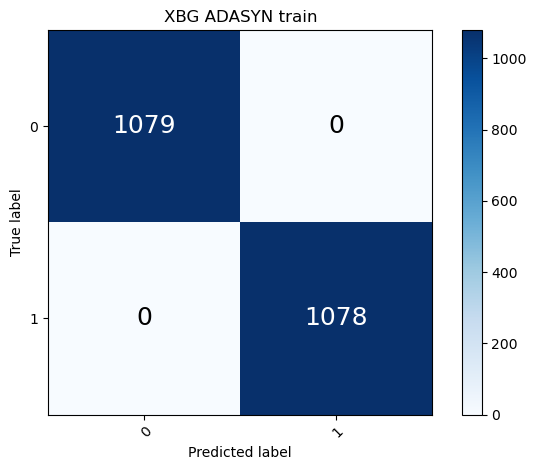

<Figure size 600x400 with 0 Axes>

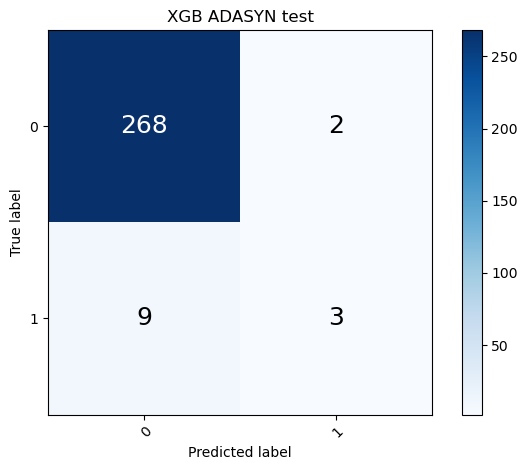

In [15]:
xgb_modelADASYN = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelADASYN.fit(train_xADASYN, train_yADASYN)
train_predADASYN = xgb_modelADASYN.predict(train_xADASYN)
test_predADASYN = xgb_modelADASYN.predict(test_xADASYN)
plot_confusion_matrix(train_yADASYN,train_predADASYN , ['0','1'], title='XBG ADASYN train')
rf_results2(xgb_modelADASYN, train_xADASYN, train_yADASYN, test_xADASYN, test_yADASYN)
plot_confusion_matrix(test_yADASYN,test_predADASYN , ['0','1'], title='XGB ADASYN test')

# Morgan finger prints r=2

In [16]:
def read_from_csv(file_path, bind_or_inhib, dataset_name):
    train_x_df = pd.read_csv(file_path+bind_or_inhib+ '_train_x_'+dataset_name+'.csv')
    train_y_df= pd.read_csv(file_path+bind_or_inhib+ '_train_y_'+dataset_name+'.csv')
    test_x_df= pd.read_csv(file_path+bind_or_inhib+ '_test_x_'+dataset_name+'.csv')
    test_y_df= pd.read_csv(file_path+bind_or_inhib+ '_test_y_'+dataset_name+'.csv')

    train_x = train_x_df.to_numpy()
    train_y = train_y_df.to_numpy().reshape(-1)
    test_x = test_x_df.to_numpy()
    test_y = test_y_df.to_numpy().reshape(-1)
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    return train_x, train_y, test_x, test_y

In [30]:
train_xMorgan2, train_yMorgan2, test_xMorgan2, test_yMorgan2 = read_from_csv(split_path, 'inhib', 'normMorgan2')

(1124, 2048) (1124,) (282, 2048) (282,)


In [27]:
train_xMorgan2SMOTE, train_yMorgan2SMOTE, test_xMorgan2SMOTE, test_yMorgan2SMOTE = read_from_csv(split_path, 'inhib', 'Morgan2SMOTE')

(2159, 2048) (2159,) (282, 2048) (282,)


In [28]:
train_xMorgan2UNDER, train_yMorgan2UNDER, test_xMorgan2UNDER, test_yMorgan2UNDER = read_from_csv(split_path, 'inhib', 'Morgan2UNDER')

(89, 2048) (89,) (282, 2048) (282,)


In [42]:
train_xMorgan2ADASYN, train_yMorgan2ADASYN, test_xMorgan2ADASYN, test_yMorgan2ADASYN = read_from_csv(split_path, 'inhib', 'Morgan2ADASYN')

(2164, 2048) (2164,) (282, 2048) (282,)


TRAIN: accuracy: 0.999, precision: 0.978, recall: 1.000, specificity: 0.999
TEST: accuracy: 0.972, precision: 0.833, recall: 0.417, specificity: 0.996


<Figure size 600x400 with 0 Axes>

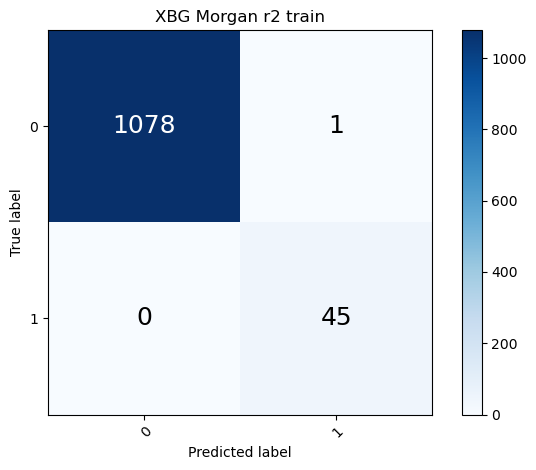

<Figure size 600x400 with 0 Axes>

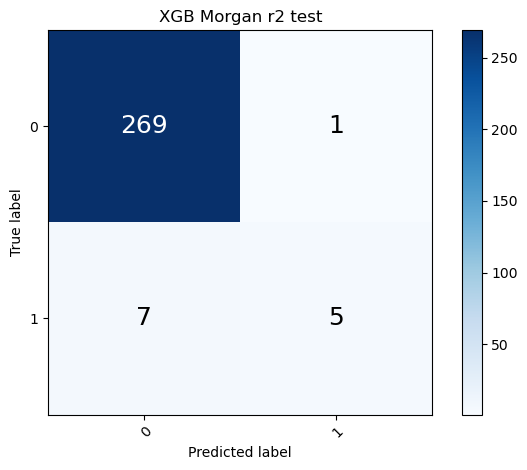

In [20]:
xgb_modelMorgan2 = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelMorgan2.fit(train_xMorgan2, train_yMorgan2)
train_predMorgan2 = xgb_modelMorgan2.predict(train_xMorgan2)
test_predMorgan2 = xgb_modelMorgan2.predict(test_xMorgan2)
plot_confusion_matrix(train_yMorgan2,train_predMorgan2 , ['0','1'], title='XBG Morgan r2 train')
rf_results2(xgb_modelMorgan2, train_xMorgan2, train_yMorgan2, test_xMorgan2, test_yMorgan2)
plot_confusion_matrix(test_yMorgan2,test_predMorgan2 , ['0','1'], title='XGB Morgan r2 test')

TRAIN: accuracy: 1.000, precision: 0.999, recall: 1.000, specificity: 0.999
TEST: accuracy: 0.961, precision: 0.571, recall: 0.333, specificity: 0.989


<Figure size 600x400 with 0 Axes>

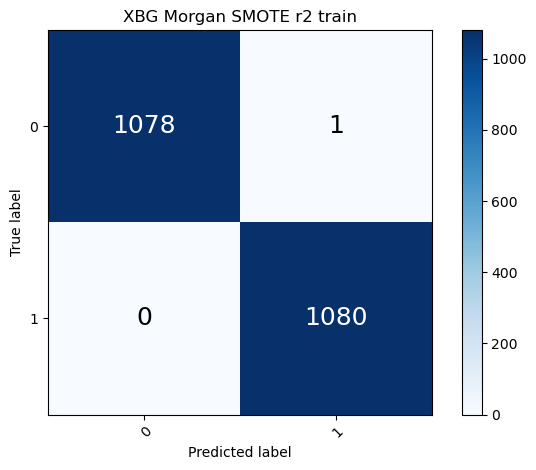

<Figure size 600x400 with 0 Axes>

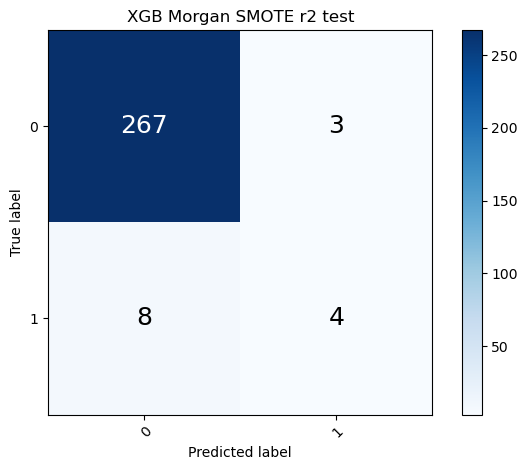

In [23]:
xgb_modelMorgan2SMOTE = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelMorgan2SMOTE.fit(train_xMorgan2SMOTE, train_yMorgan2SMOTE)
train_predMorgan2SMOTE = xgb_modelMorgan2SMOTE.predict(train_xMorgan2SMOTE)
test_predMorgan2SMOTE = xgb_modelMorgan2SMOTE.predict(test_xMorgan2SMOTE)
plot_confusion_matrix(train_yMorgan2SMOTE,train_predMorgan2SMOTE , ['0','1'], title='XBG Morgan SMOTE r2 train')
rf_results2(xgb_modelMorgan2SMOTE, train_xMorgan2SMOTE, train_yMorgan2SMOTE, test_xMorgan2SMOTE, test_yMorgan2SMOTE)
plot_confusion_matrix(test_yMorgan2SMOTE,test_predMorgan2SMOTE , ['0','1'], title='XGB Morgan SMOTE r2 test')

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.755, precision: 0.110, recall: 0.667, specificity: 0.759


<Figure size 600x400 with 0 Axes>

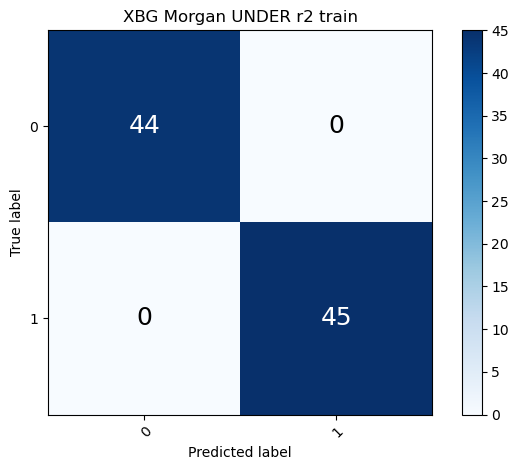

<Figure size 600x400 with 0 Axes>

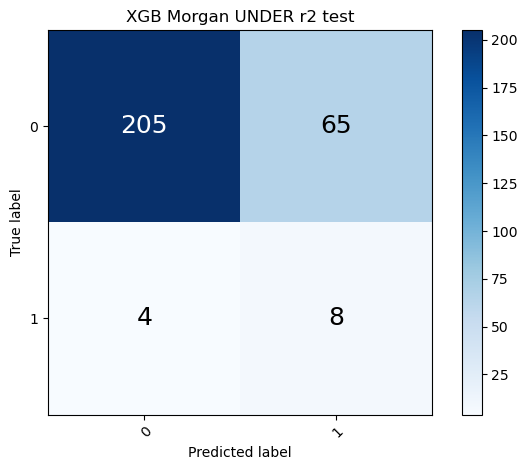

In [31]:
xgb_modelMorgan2UNDER = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelMorgan2UNDER.fit(train_xMorgan2UNDER, train_yMorgan2UNDER)
train_predMorgan2UNDER = xgb_modelMorgan2UNDER.predict(train_xMorgan2UNDER)
test_predMorgan2UNDER = xgb_modelMorgan2UNDER.predict(test_xMorgan2UNDER)
plot_confusion_matrix(train_yMorgan2UNDER,train_predMorgan2UNDER , ['0','1'], title='XBG Morgan UNDER r2 train')
rf_results2(xgb_modelMorgan2UNDER, train_xMorgan2UNDER, train_yMorgan2UNDER, test_xMorgan2UNDER, test_yMorgan2UNDER)
plot_confusion_matrix(test_yMorgan2UNDER,test_predMorgan2UNDER , ['0','1'], title='XGB Morgan UNDER r2 test')

TRAIN: accuracy: 1.000, precision: 0.999, recall: 1.000, specificity: 0.999
TEST: accuracy: 0.961, precision: 0.571, recall: 0.333, specificity: 0.989


<Figure size 600x400 with 0 Axes>

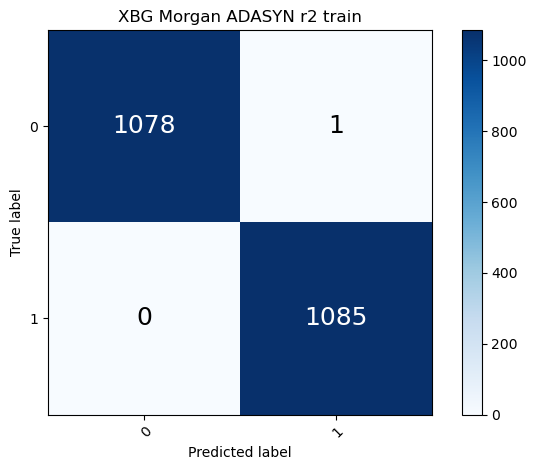

<Figure size 600x400 with 0 Axes>

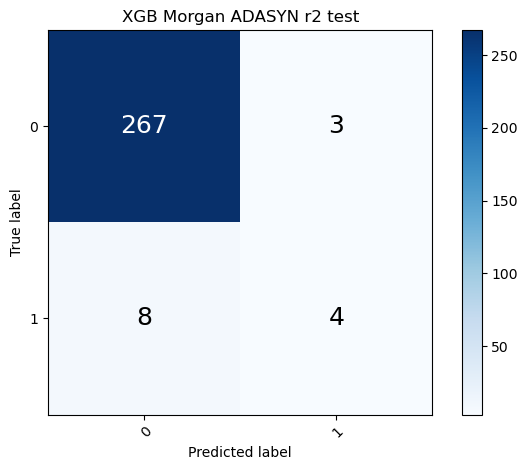

In [33]:
xgb_modelMorgan2ADASYN = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelMorgan2ADASYN.fit(train_xMorgan2ADASYN, train_yMorgan2ADASYN)
train_predMorgan2ADASYN = xgb_modelMorgan2ADASYN.predict(train_xMorgan2ADASYN)
test_predMorgan2ADASYN = xgb_modelMorgan2ADASYN.predict(test_xMorgan2ADASYN)
plot_confusion_matrix(train_yMorgan2ADASYN,train_predMorgan2ADASYN, ['0','1'], title='XBG Morgan ADASYN r2 train')
rf_results2(xgb_modelMorgan2ADASYN, train_xMorgan2ADASYN, train_yMorgan2ADASYN, test_xMorgan2ADASYN, test_yMorgan2ADASYN)
plot_confusion_matrix(test_yMorgan2ADASYN,test_predMorgan2ADASYN , ['0','1'], title='XGB Morgan ADASYN r2 test')

# combined MOE Morgan r=2 

(1124, 2354) (1124,) (282, 2354) (282,)
TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.972, precision: 1.000, recall: 0.333, specificity: 1.000


<Figure size 600x400 with 0 Axes>

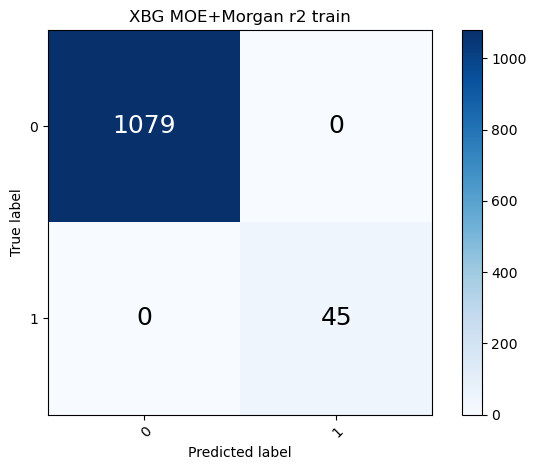

<Figure size 600x400 with 0 Axes>

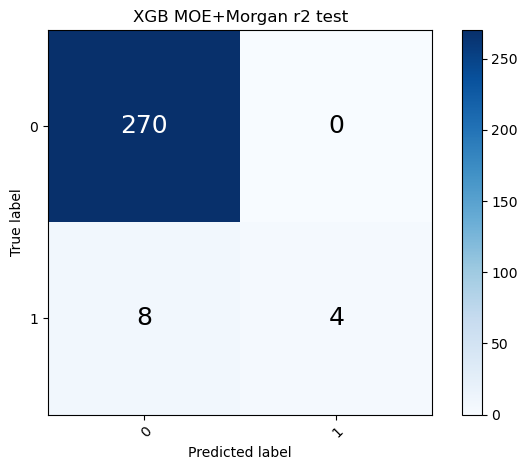

In [35]:
train_xcombo, train_ycombo, test_xcombo, test_ycombo = read_from_csv(split_path, 'inhib', 'MOEMorgan2combo')

xgb_modelcombo = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelcombo.fit(train_xcombo, train_ycombo)
train_predcombo = xgb_modelcombo.predict(train_xcombo)
test_predcombo = xgb_modelcombo.predict(test_xcombo)
plot_confusion_matrix(train_ycombo,train_predcombo, ['0','1'], title='XBG MOE+Morgan r2 train')
rf_results2(xgb_modelcombo, train_xcombo, train_ycombo, test_xcombo, test_ycombo)
plot_confusion_matrix(test_ycombo,test_predcombo , ['0','1'], title='XGB MOE+Morgan r2 test')

(2159, 2354) (2159,) (282, 2354) (282,)
TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.961, precision: 0.600, recall: 0.250, specificity: 0.993


<Figure size 600x400 with 0 Axes>

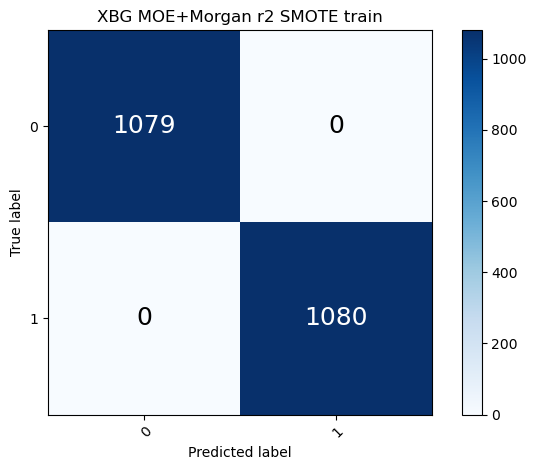

<Figure size 600x400 with 0 Axes>

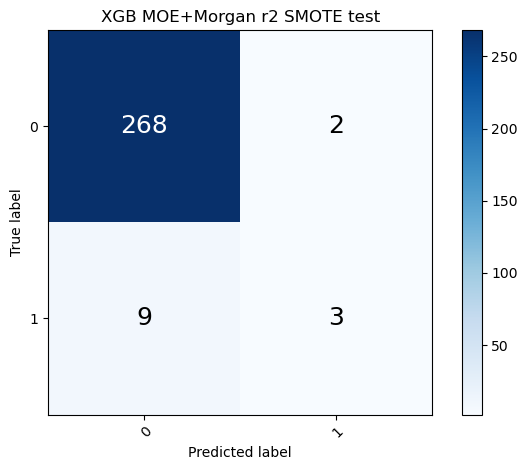

In [37]:
train_xcomboSMOTE, train_ycomboSMOTE, test_xcomboSMOTE, test_ycomboSMOTE = read_from_csv(split_path, 'inhib', 'Morgan2comboSMOTE')

xgb_modelcomboSMOTE = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelcomboSMOTE.fit(train_xcomboSMOTE, train_ycomboSMOTE)
train_predcomboSMOTE = xgb_modelcomboSMOTE.predict(train_xcomboSMOTE)
test_predcomboSMOTE = xgb_modelcomboSMOTE.predict(test_xcomboSMOTE)
plot_confusion_matrix(train_ycomboSMOTE,train_predcomboSMOTE, ['0','1'], title='XBG MOE+Morgan r2 SMOTE train')
rf_results2(xgb_modelcomboSMOTE, train_xcomboSMOTE, train_ycomboSMOTE, test_xcomboSMOTE, test_ycomboSMOTE)
plot_confusion_matrix(test_ycomboSMOTE,test_predcomboSMOTE, ['0','1'], title='XGB MOE+Morgan r2 SMOTE test')

(89, 2354) (89,) (282, 2354) (282,)
TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.709, precision: 0.073, recall: 0.500, specificity: 0.719


<Figure size 600x400 with 0 Axes>

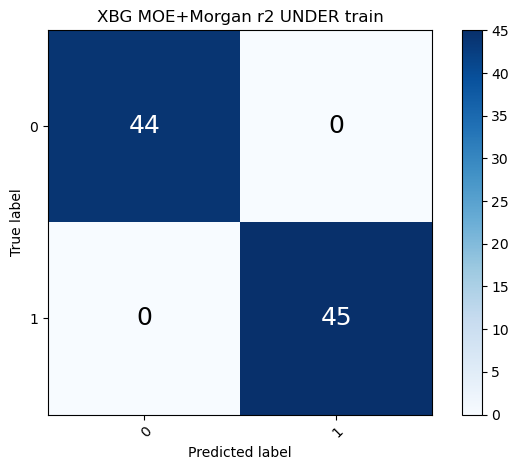

<Figure size 600x400 with 0 Axes>

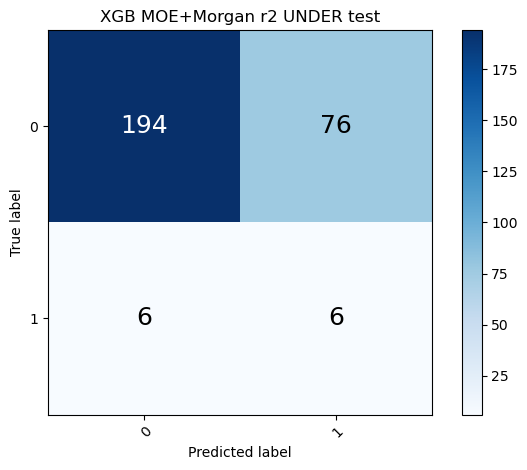

In [39]:
train_xcomboUNDER, train_ycomboUNDER, test_xcomboUNDER, test_ycomboUNDER = read_from_csv(split_path, 'inhib', 'Morgan2comboUNDER')

xgb_modelcomboUNDER = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelcomboUNDER.fit(train_xcomboUNDER, train_ycomboUNDER)
train_predcomboUNDER = xgb_modelcomboUNDER.predict(train_xcomboUNDER)
test_predcomboUNDER = xgb_modelcomboUNDER.predict(test_xcomboUNDER)
plot_confusion_matrix(train_ycomboUNDER,train_predcomboUNDER, ['0','1'], title='XBG MOE+Morgan r2 UNDER train')
rf_results2(xgb_modelcomboUNDER, train_xcomboUNDER, train_ycomboUNDER, test_xcomboUNDER, test_ycomboUNDER)
plot_confusion_matrix(test_ycomboUNDER,test_predcomboUNDER, ['0','1'], title='XGB MOE+Morgan r2 UNDER test')

In [43]:
train_xcomboADASYN, train_ycomboADASYN, test_xcomboADASYN, test_ycomboADASYN = read_from_csv(split_path, 'inhib', 'Morgan2comboADASYN')

(2157, 2354) (2157,) (282, 1) (663828,)


In [41]:
train_xcomboADASYN, train_ycomboADASYN, test_xcomboADASYN, test_ycomboADASYN = read_from_csv(split_path, 'inhib', 'Morgan2comboADASYN')

xgb_modelcomboADASYN = xgb.XGBClassifier(objective='binary:logistic')
xgb_modelcomboADASYN.fit(train_xcomboADASYN, train_ycomboADASYN)
train_predcomboADASYN = xgb_modelcomboADASYN.predict(train_xcomboADASYN)
test_predcomboADASYN = xgb_modelcomboADASYN.predict(test_xcomboADASYN)
plot_confusion_matrix(train_ycomboADASYN,train_predcomboADASYN, ['0','1'], title='XBG MOE+Morgan r2 ADASYN train')
rf_results2(xgb_modelcomboADASYN, train_xcomboADASYN, train_ycomboADASYN, test_xcomboADASYN, test_ycomboADASYN)
plot_confusion_matrix(test_ycomboADASYN,test_predcomboADASYN, ['0','1'], title='XGB MOE+Morgan r2 ADASYN test')

(2157, 2354) (2157,) (282, 1) (663828,)


ValueError: Feature shape mismatch, expected: 2354, got 1